# Getting Started with Symbulate

## Section 3. Multiple Random Variables and Joint Distributions

<[Random variables](gs_rv.ipynb) | [Contents](index.ipynb) | [Conditioning](gs_conditioning.ipynb)>

**Every time you start Symbulate**, you must first run (SHIFT-ENTER) the following commands.

In [1]:
from symbulate import *
%matplotlib inline

This section provides an introduction to the Symbulate commands for simulating and summarizing values of multiple random variables.

We are often interested in several [RV](https://dlsun.github.io/symbulate/rv.html)s defined on  the same [probability space](https://dlsun.github.io/symbulate/probspace.html).  Of interest are properties of the [*joint distribution*](https://dlsun.github.io/symbulate/joint.html#Multiple-random-variables) which describe the relationship between the random variables.

<a id='coin_heads_alt'></a>
### Example 3.1: The joint distribution of the number of Heads and the number of switches between Heads and Tails in coin flips

Let `X` be the number of Heads in a sequence of five coin flips, and let `Y` be the number of times the sequence switches between Heads and Tails (not counting the first toss). For example, for the outcome (0, 1, 0, 0, 1), `X = 2` and since a switch occurs on the second, third, and fifth flip, `Y = 3`.  The code below defines the probability space and the two `RV`s. The `RV` `Y` is defined through a [user defined function](https://dlsun.github.io/symbulate/rv.html#Defining-a-random-variable-with-RV); see [Example 2.18](gs_rv.ipynb#Numb_distinct).

In [2]:
def number_switches(x):
    count = 0
    for i in list(range(1, len(x))):
        if x[i] != x[i-1]:
            count += 1
    return count

P = BoxModel([1, 0], size=5)
X = RV(P, sum)
Y = RV(P, number_switches)

outcome = (0, 1, 0, 0, 1)
X(outcome), Y(outcome)

(2, 3)

Each `RV` `X` and `Y` can be simulated individually as in [Section 2](gs_rv.ipynb).  Within the context of several random variables, the distribution of a single random variable is called its [marginal distribution](https://dlsun.github.io/symbulate/joint.html#marginal).  The plot below approximates the marginal distribution of `Y`, the number of switches between Heads and Tails in five coin flips.  Note that `Y` can take values 0, 1, 2, 3, 4.

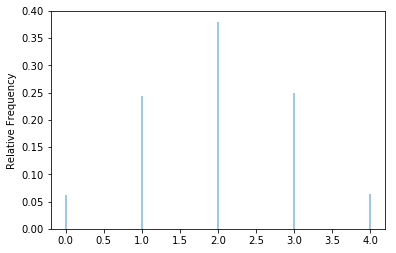

In [3]:
Y.sim(10000).plot()

However, simulating values of `X` and `Y` individually does not provide any information about the *relationship* between the variables.  Joining `X` and `Y` with an ampersand [&](https://dlsun.github.io/symbulate/joint.html#ampersand)  and calling [`.sim()`](https://dlsun.github.io/symbulate/sim.html#sim) simultaneously simulates the pair of `(X, Y)` values for each simulated outcome.  The simulated results can be used to approximate the [joint distribution](https://dlsun.github.io/symbulate/joint.html#joint) of `X` and `Y` which describes the possible pairs of values and their relative likelihoods.

In [4]:
(X & Y).sim(10000).tabulate()

"(0, 0)",325
"(1, 1)",638
"(1, 2)",992
"(2, 1)",628
"(2, 2)",960
"(2, 3)",1226
"(2, 4)",299
"(3, 1)",618
"(3, 2)",891
"(3, 3)",1282
"(3, 4)",328


Simulating `(X, Y)` pairs in this way, we can examine the relationship between the random variables `X` and `Y`.  For example, for an outcome with `X = 5` all five flips are Heads so no switches occur and it must be true that `Y = 0`.  For outcomes with `X = 4`, either `Y = 1` or `Y = 2`, with a value of 2 occuring more frequently. Thus while `Y` can marginally take values 0, 1, 2, 3, 4, only `Y = 0` is possible when `X = 5`, only `Y = 1` or `Y = 2` is possible when `X = 4`, and so on.  Also, for example, outcomes for which `X = 2` and `Y = 3` occur about four times as frequently as those for which `X = 5` and `Y = 0`.

<a id='sum_max_dice'></a>
### Exercise 3.2: Joint distribution of the sum and the max of two dice rolls

Roll two fair six-sided dice and let `X` be their sum and `Y` be the larger (`max`) of the two numbers rolled (or the common value if a tie).

Define appropriate [`RV`](https://dlsun.github.io/symbulate/rv.html#RV)s and simulate 10000 `(X, Y)` pairs using [`&`](https://dlsun.github.io/symbulate/joint.html#ampersand) and [`sim()`](https://dlsun.github.io/symbulate/sim.html#sim). Tabulate the results.

In [5]:
### Type your commands in this cell and then run using SHIFT-ENTER.

[Solution](#sol_sum_max_dice)

<a id='visualizing'></a>
### Example 3.3: Visualizing a joint distribution

The simluated joint distribution in [Example 3.1](#coin_heads_alt) can be visualized by calling [`.plot()`](https://dlsun.github.io/symbulate/rv.html#plot). Calling [`.plot()`](https://dlsun.github.io/symbulate/rv.html#plot) for two discrete random variables returns a scatterplot of simulated `(X,Y)` pairs.

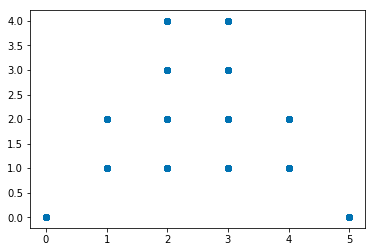

In [6]:
(X & Y).sim(10000).plot()

For discrete random variables it is recommended to use the `jitter=True` option with scatterplots so that points do not overlap.

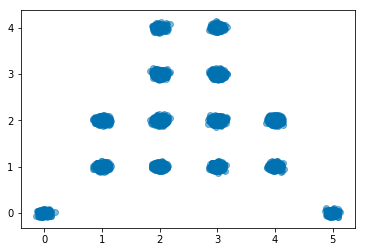

In [7]:
(X & Y).sim(10000).plot(type="scatter", jitter=True)

Using the `type="tile"` option create a tile plot (a.k.a. heat map) where the color of each rectangle represents the relative frequency of the corresponding simulated `(X, Y)` pair .

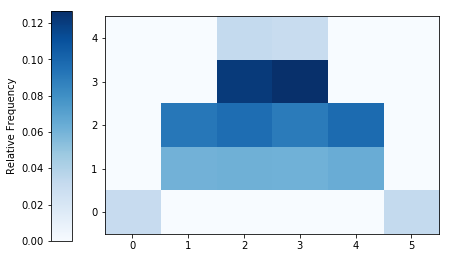

In [8]:
(X & Y).sim(10000).plot(type='tile')

<a id='plot_joint_sum_max'></a>
### Exercise 3.4: Visualizing the joint distribution of the sum and the max of two dice rolls

Continuing [Exercise 3.2](#sum_max_dice) let `X` be the sum and `Y` be the larger (`max`) of two rolls of a fair six-sided die.

Simulate 10000 `(X, Y)` pairs using [`&`](https://dlsun.github.io/symbulate/joint.html#ampersand) and [`sim()`](https://dlsun.github.io/symbulate/sim.html#sim).  Display the approximate joint distribution with both a tile plot and scatterplot (with `jitter=true`).  

In [9]:
### Type your commands in this cell and then run using SHIFT-ENTER.

[Solution](#sol_plot_joint_sum_max)

<a id='indep_var'></a>
### Example 3.5: Defining independent random variables

Random variables `X` and `Y` are [*independent*](https://dlsun.github.io/symbulate/joint.html#def_ind_ran) if knowing information about the value of one does not influence the distribution of the other.  For independent random variables, their joint distribution is the *product* of the respective marginal distributions.

For example, let `X` represent the number of Heads in two flips of a fair coin, and let `Y` represent the number of 1s rolled in three rolls of a fair six-sided die.

In [10]:
Flips = BoxModel([1, 0], size=2)
X = RV(Flips, sum)

Rolls = BoxModel([1, 0], probs=[1/6, 5/6], size=3)  # 1 = roll 1; 0 = do not roll 1
Y = RV(Rolls, sum)

The flips of the coin and the rolls of the die are physically independent so it is safe to assume that the random variables `X` and `Y` are independent.  The  [`AssumeIndependent`](https://dlsun.github.io/symbulate/joint.html#Defining-independent-random-variables) command below tells Symbulate to treat the random variables `X` and `Y` as independent.

In [11]:
X, Y = AssumeIndependent(X, Y)

When pairs of independent random variables are simulated, the values of one variable are generated independently of the values of the other.

In [12]:
(X & Y).sim(10000).tabulate()

"(0, 0)",1428
"(0, 1)",879
"(0, 2)",178
"(0, 3)",16
"(1, 0)",2816
"(1, 1)",1741
"(1, 2)",342
"(1, 3)",22
"(2, 0)",1503
"(2, 1)",888
"(2, 2)",171


For example, the joint probability `P(X = 1, Y = 2)`, which is about 0.035, is equal to the product of the marginal probabilities `P(X = 1)` and `P(Y = 2)`, as approximated in the following code.

In [13]:
(X.sim(10000).count_eq(1) / 10000) * (Y.sim(10000).count_eq(2) / 10000)

0.034568140000000004

<a id='#assume_indep'></a>
### Exercise 3.6: Using `AssumeIndependent` for defining independent random variables

Let `X` be the number of heads in five flips of a fair coin and `Y` be the sum of two rolls of a fair six-sided die. Define appropriate [`RV`](https://dlsun.github.io/symbulate/rv.html#RV)s, and assume independence with the `AssumeIndependent()` function. Simulate 10000 `(X, Y)` pairs and plot the approximate joint distribution.

In [14]:
### Type your commands in this cell and then run using SHIFT-ENTER.

[Solution](#sol_assume_indep)

<a id='indep_var_via_dist'></a>
### Example 3.7: Defining independent random variables via distributions

We have seen that it is common to [define a random variable via its distribution](https://dlsun.github.io/symbulate/rv.html#distribution), as in [Example 2.7](gs_rv.ipynb#sim_from_binom).  When dealing with multiple random variables it is common to specify the marginal distribution of each and assume independence.  In [Example 3.5](#indep_var), the marginal distribution of `X` is [`Binomial`](https://dlsun.github.io/symbulate/common_discrete.html#binomial) with `n=2` and `p=0.5` while the marginal distribution of `Y` is [`Binomial`](https://dlsun.github.io/symbulate/common_discrete.html#binomial) with `n=3` and `p=1/6`.   Independence of distributions is represented by the asterisks [`*`](https://dlsun.github.io/symbulate/joint.html#def_ind_ran) (reflecting that under independence the joint distribution is the *product* of the respective marginal distributions.)

In [15]:
X, Y = RV(Binomial(n=2, p=0.5) * Binomial(n=3, p=1/6))
(X & Y).sim(10000).tabulate()

"(0, 0)",1380
"(0, 1)",922
"(0, 2)",176
"(0, 3)",8
"(1, 0)",2854
"(1, 1)",1745
"(1, 2)",337
"(1, 3)",22
"(2, 0)",1480
"(2, 1)",901
"(2, 2)",160


Random variables are "independent and identically distribution (i.i.d.)" when they are independent and have a common marginal distribution.  For example, if `V` represents the number of heads in two flips of a penny and `W` the number of Heads in two flips of a dime, then `V` and `W` are i.i.d., with a common marginal `Binomial(n=2, p=0.5)` distribution.  For i.i.d. random variables, defining the joint distribution using the "exponentiation" notation [`**`](https://dlsun.github.io/symbulate/probspace.html#Independent-probability-spaces) makes the code a little more compact.

In [16]:
V, W = RV(Binomial(n=2, p=0.5) ** 2)

<a id='indep_via_unif'></a>
### Exercise 3.8: Defining independent random variables

Let `X` be a random variable with a `Binomial(n=4, p=0.25)` distribution, and let `Y` be a random variable with a `Binomial(n=3, p=0.7)` distribution. Use [`*`](https://dlsun.github.io/symbulate/probspace.html#indep) to specify the joint distribution of the `RV`s `X` and `Y` as the product of their marginal distributions. Simulate 10000 `(X,Y)` pairs and approximate the joint distribution.

In [17]:
### Type your commands in this cell and then run using SHIFT-ENTER.

[Solution](#sol_indep_via_unif)

<a id='sum_indep_unif'></a>
### Example 3.9: Sum of independent RVs

In [Example 2.16](gs_rv.ipynb#sqrt_ex) we introduced [transformations of random variables](https://dlsun.github.io/symbulate/joint.html#Transformations-of-random-variables). It is often of interest to look at a transformation of multiple random variables. Transformations of random variables such as addition, subtraction, etc. are only possible when the random variables are defined on the same probability space.

For example, assume that `X` and `Y` are independent and that each of `X` and `Y` has a marginal Uniform distribution on [0, 1].  Define the random variable `Z = X + Y`, the sum of two independent RVs `X` and `Y`.

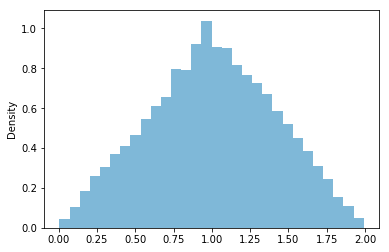

In [18]:
X, Y = RV(Uniform(0, 1) * Uniform(0,1))
Z = X + Y
Z.sim(10000).plot()

Notice that `Z` takes values in the interval [0, 2], but `Z` does not have a Uniform distribution. Intuitively, there is only one `(X, Y)` pair, (0, 0), for which the sum is 0, but many  `(X, Y)` pairs - (1, 0), (0, 1), (0.5, 0.5), (0.8, 0.2), etc - for which the sum is 1.

<a id='prod_indep'></a>
### Exercise 3.10: Product of independent RVs

Let `X` represent the base (inches) and `Y` the height (inches) of a "random rectangle".  Assume that `X` and `Y` are independent, and that `X` has a `Uniform(2, 5)` distribution and `Y` has a `Uniform(1, 3)` distribution. Let `Z = X * Y` represent the area of the rectangle. Simulate 10000 values of `Z` and display its approximate distribution in a plot.

In [19]:
### Type your commands in this cell and then run using SHIFT-ENTER.

[Solution](#sol_prod_indep)

<a id='corr_numb_alt'></a>
### Example 3.11: Correlation between random variables

The strength of the relationship between two random variables can be estimated with the *correlation coefficient* of the simulated pairs using [`.corr()`](https://dlsun.github.io/symbulate/joint.html#corr). For example, let `X` represent the number of Heads in two flips of a penny and let `Y` represent the number of Heads in three flips of a dime. Then `Z = X + Y` is the total number of Heads in the five flips.  The following code simulates many `(X, Z)` pairs and estimates their correlation

0.62391912655346593

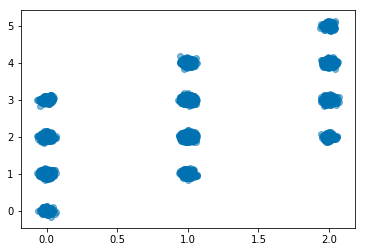

In [20]:
X, Y = RV(Binomial(n=2, p=0.5) * Binomial(n=3, p=0.5))
Z = X + Y
xz = (X & Z).sim(10000)
xz.plot(jitter=True)
xz.corr()

The positive correlation coefficient of about 0.6 represents a *positive associaton*: above average values of `X` tend to be associated with above average values of `Z`; likewise for below average values.

If two random variables are independent, then there is no association between them and so their correlation coefficient is 0.

0.0015762630316967193

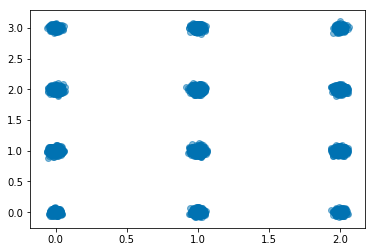

In [21]:
xy = (X & Y).sim(10000)
xy.plot(jitter=True)
xy.corr()

However, a correlation coefficient of 0 does not necessarily imply that random variables are independent.  Correlation measures a particular kind of relationship, namely, how strong is the *linear association* between two random variables?  That is, how closely do the $(x, y)$ pairs tend to follow a straight line?

Consider [Example 3.1](#coin_heads_alt): `X` is the number of Heads in a sequence of five coin flips, and `Y` is the number of times the sequence switches between Heads and Tails (not counting the first toss).  Then `X` and `Y` are *not* independent.  For example, if `X=0` then it must be true that `Y=0`.  However, the correlation coefficient between `X` and `Y` is 0.

0.013263919554291757

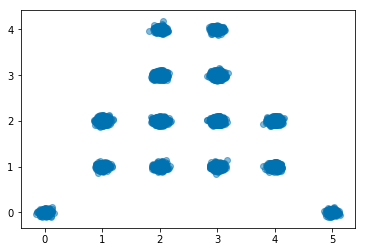

In [22]:
def number_switches(x):
    count = 0
    for i in list(range(1, len(x))):
        if x[i] != x[i-1]:
            count += 1
    return count

P = BoxModel([1, 0], size=5)
X = RV(P, sum)
Y = RV(P, number_switches)
xy = (X & Y).sim(10000)
xy.plot(jitter = True)
xy.corr()

<a id='corr_sum_max'></a>
### Exercise 3.12: Correlation between the sum and the max of two dice

Continuing [Exercise 3.2](#sum_max_dice), display the approximate joint distribution of `X` and `Y`, the sum and the max, respectively, of two fair six-sided dice rolls, and estimate the correlation coefficient.

In [23]:
### Type your commands in this cell and then run using SHIFT-ENTER.

[Solution](#sol_corr_sum_max)

[Back to Contents](#contents)

## Additional Exercises

<a id='ratio_max_sum'></a>
### Exercise 3.13: Ratio of max and sum of two six-sided dice

Define Z as the ratio between the larger of two six-sided dice rolls and the sum of two six-sided dice rolls. Approximate the distribution of Z and estimate `P(Z <= 1.5)`, the probability that the ratio is less than or equal to 0.7.

In [24]:
### Type your commands in this cell and then run using SHIFT-ENTER.

[Hint](#hint_ratio_max_sum)

[Solution](#sol_ratio_max_sum)

<a id='est_corr_unpack'></a>
### Exercise 3.14: Estimating correlation and plotting joint distributions

Suppose X is Uniform(0,2) and Y is Uniform(1,3). Define Z to be equal to X + Y (assuming X and Y are independent).

1) Estimate the correlation coefficient between X and Z. 

In [25]:
### Type your commands in this cell and then run using SHIFT-ENTER.

2) Approximate the joint distribution of X and Z.

In [26]:
### Type your commands in this cell and then run using SHIFT-ENTER.

[Hint](#hint_est_corr_unpack)

[Solution](#sol_est_corr_unpack)

<a id='Hints'></a>
## Hints for Additional Exercises

<a id='hint_ratio_max_sum'></a>
## Exercise 3.13: Hint

In [Exercise 3.2](#sum_max_dice) you simulated the sum and max of two dice. In [Exercise 3.10](prod_indep) you simulated the product of two random variables. Use a [`count`](https://dlsun.github.io/symbulate/sim.html#count) function to estimate `P(Z <= 1.5)`.

[Back](#ratio_max_sum)

<a id='hint_est_corr_unpack'></a>
## Exercise 3.14: Hint

In [Example 3.11](#corr_numb_alt) we estimated the correlation coefficient between two random variables and plotted the joint distribution. In [Example 3.9](#sum_indep_unif) we defined a random variable as the sum of two other independent variables.

[Back](#est_corr_unpack)

[Back to Contents](#contents)

## Solutions to Exercises

<a id ='sol_sum_max_dice'></a>
### Exercise 3.2: Solution

In [27]:
P = BoxModel([1, 2, 3, 4, 5, 6], size=2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).tabulate()

"(2, 1)",280
"(3, 2)",536
"(4, 2)",259
"(4, 3)",514
"(5, 3)",538
"(5, 4)",570
"(6, 3)",284
"(6, 4)",556
"(6, 5)",546
"(7, 4)",534
"(7, 5)",579


[Back](#visualizing)

<a id='sol_plot_joint_sum_max'></a>
### Exercise 3.4: Solution

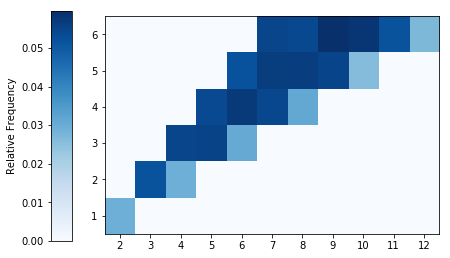

In [28]:
P = BoxModel([1, 2, 3, 4, 5, 6], size=2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).plot(type="tile")

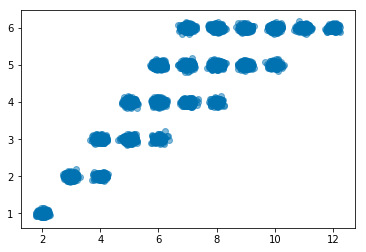

In [29]:
(X & Y).sim(10000).plot(type="scatter", jitter=True)

[Back](#indep_var)

<a id ='sol_assume_indep'></a>
### Exercise 3.6: Solution

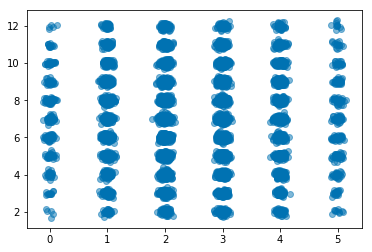

In [30]:
P = BoxModel([1, 0], size=5)
X = RV(P, sum)

Q = BoxModel([1, 2, 3, 4, 5, 6], size=2)
Y = RV(Q, sum)

X, Y = AssumeIndependent(X, Y)
(X & Y).sim(10000).plot(jitter='True')

[Back](#indep_var_via_dist)

<a id ='sol_indep_via_unif'></a>
### Exercise 3.8: Solution

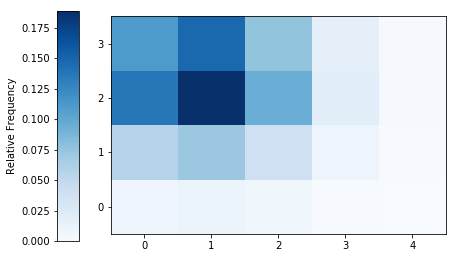

In [31]:
X, Y = RV(Binomial(n=4, p=0.25) * Binomial(n=3, p=0.7))
(X & Y).sim(10000).plot("tile")

[Back](#sum_indep_unif)

<a id ='sol_prod_indep'></a>
### Exercise 3.10: Solution

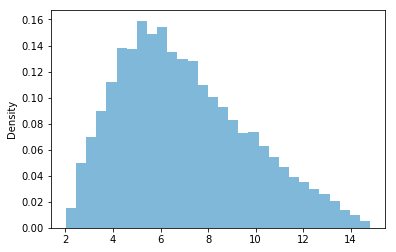

In [32]:
X, Y = RV(Uniform(a=2, b=5) * Uniform(a=1, b=3))
Z = X * Y
Z.sim(10000).plot()

Note that `Z` takes values in the interval `[2 * 1, 5 * 3]` but some values have greater density than others.

[Back](#corr_numb_alt)

<a id ='sol_corr_sum_max'></a>
### Exercise 3.12: Solution

0.85914627467851412

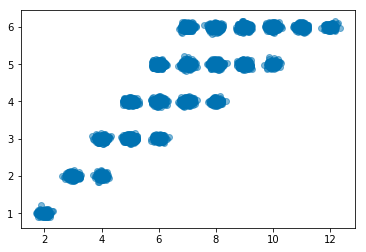

In [33]:
P = BoxModel([1, 2, 3, 4, 5, 6], size=2)
X = RV(P, sum)
Y = RV(P, max)
xy = (X & Y).sim(10000)
xy.plot(jitter=True)
xy.corr()

[Back](#bivariate)

<a id ='sol_ratio_max_sum'></a>
### Exercise 3.13: Solution

0.6681

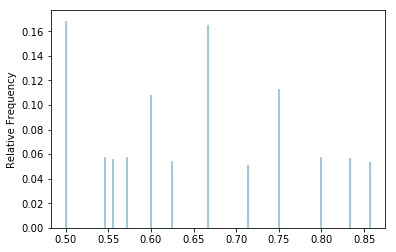

In [34]:
P = BoxModel([1, 2, 3, 4, 5, 6], size=2)
X = RV(P, sum)
Y = RV(P, max)
Z = Y / X
sims = Z.sim(10000)
sims.plot()
sims.count_leq(0.7)/10000

[Back](#est_corr_unpack)

<a id ='sol_est_corr_unpack'></a>
### Exercise 3.14: Solution

1) Estimate the correlation coefficient between X and Z.

In [35]:
X, Y = RV(Uniform(0, 2) * Uniform(1, 3))
Z = X + Y
(X & Z).sim(10000).corr()

0.71650633289507204

2) Approximate the joint distribution of X and Z.

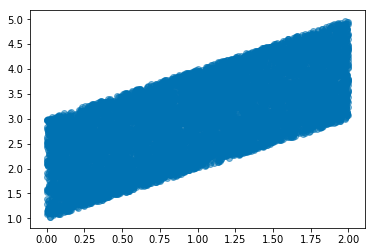

In [36]:
(X & Z).sim(10000).plot()

[Back](#Hints)

<[Random variables](gs_rv.ipynb) | [Contents](index.ipynb) | [Conditioning](gs_conditioning.ipynb)>